In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import scipy.optimize
import numdifftools as nd
from numdifftools import Jacobian, Hessian
sns.set()

In [8]:
!pip install numdifftools

In [10]:
pd.set_option('precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [349]:
#df = pd.read_csv("https://raw.githubusercontent.com/Oliverkobaek/thesis_2020/master/Bresnahan/Bresnahan_data_2.csv")
df = pd.read_csv("Bresnahan_data_full_inf.csv")
df = df.drop(['Unnamed: 0'], axis=1)

In [350]:
# Fjerner København
#
#storbyer = [101, 147, 461, 751, 851]
  
#for i in storbyer:
#    df = df[df['Kommune'] != i]
    
    
#df = df[df['Kommune'] != 101]
#df = df[df['Kommune'] != 147]
#df = df[df['Kommune']]

#år = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
    

#df = df[(df['År'] != 2015) & (df['År'] !=  2016) & (df['År'] !=  2017) & (df['År'] !=  2018)]

df = df[(df['År'] != 2008) & (df['År'] !=  2009) & (df['År'] !=  2010) & (df['År'] !=  2011)& (df['År'] !=  2012)& (df['År'] !=  2013)& (df['År'] !=  2014)]
#df = df[(df['År'] == 2017)] & (df['År'] !=  2015)

df['logbefolkning'] = np.log(df['Befolkning'])
df['logmarkedsvalue'] = df['markedsvaerdix']/1000000 #np.log()
df['logindkomst'] = df['samlet_ind']/100000 #np.log()

In [351]:
df

,Kommune,GNS_OMS,GNS_MED_PROFIT,ALDER,d65,d17,samlet_ind,Besk,Besk1864,DK,Befolkning,markedsvaerdix,yderkom,antal_apo,År,logbefolkning,logmarkedsvalue,logindkomst
679,101,25170231.33,9069587.08,35.38,0.10,0.18,203077.10,0.54,0.71,0.76,591481,1768450.97,0,27,2015,13.29,1.77,2.03
680,147,28640665.74,10270420.42,38.84,0.17,0.17,230605.31,0.52,0.75,0.82,104481,2245134.86,0,5,2015,11.56,2.25,2.31
681,151,19894295.25,7154487.87,41.36,0.21,0.22,185774.19,0.46,0.74,0.85,48224,1652916.86,0,4,2015,10.78,1.65,1.86
682,153,19786422.40,7110191.66,40.83,0.19,0.21,162131.78,0.45,0.69,0.69,35322,1704673.21,0,3,2015,10.47,1.70,1.62
683,155,nan,nan,43.41,0.24,0.23,234501.33,0.48,0.80,0.92,14142,2232076.06,0,1,2015,9.56,2.23,2.35
684,157,26172175.95,9363432.79,41.04,0.19,0.23,322673.50,0.50,0.77,0.85,75350,2940428.30,0,4,2015,11.23,2.94,3.23
685,159,33829117.50,12117829.68,39.25,0.17,0.22,201508.69,0.50,0.75,0.81,67914,1500979.42,0,3,2015,11.13,1.50,2.02
686,161,nan,nan,40.63,0.19,0.20,192028.95,0.50,0.76,0.82,22461,1363045.01,0,1,2015,10.02,1.36,1.92
687,163,nan,nan,40.42,0.18,0.22,185265.97,0.48,0.75,0.82,28423,1643733.93,0,1,2015,10.25,1.64,1.85
688,165,nan,nan,38.75,0.17,0.23,163105.33,0.45,0.70,0.73,27880,1235370.72,0,1,2015,10.24,1.24,1.63


In [352]:
def V(df, Ni, alpha=np.ones(5), beta=np.ones(5)):
    """Per-capita variable profit
    
    df: data
    Ni: number of incumbents in market i
    alpha: alpha parameters
    beta: beta parameter
    """
    n = np.min([5, Ni])
#     n = Ni
    a = 0
    for i in range(1,n):
        a = a + alpha[i]
    

    Z = np.c_[df.d65, df.d17, df.logindkomst, df.Besk1864, df.DK]# np.log()

    # W = df.LANDV
    # X = np.c_[W, Z]

    X = np.c_[Z]
    
    
    profit = alpha[0] + X @ beta - a
    return profit

def F(df, Ni, gamma=np.ones(5)):
    n = np.min([5, Ni])
#     n = Ni
    g = 0
    # gamma 2 through gamma 5 (indices 1 through 4)
    for i in range(1,n):
        g = g + gamma[i]

    fixed_cost = gamma[0] + gamma[5]*df.logmarkedsvalue + g
    return fixed_cost

#def S_func(df, lam):
def S_func(df, lam): #, lam
    S =   lam * df.logbefolkning #np.log() #
    return S

#def neg_log_lik(theta=np.ones(19), market='TIRE', df=None):
def neg_log_lik(theta=np.ones(17), market='antal_apo', df=df):#, df=None):
    lam = theta[0]
    beta = theta[1:6]
    alpha = theta[6:11]
    gamma = theta[11:17]
#    beta = theta[0:5]
#    alpha = theta[5:10]
#    gamma = theta[10:16]
    
    
    Phi = scipy.stats.norm.cdf
    
    S = S_func(df, lam) #, lam

    
    P = [0] * 6
    Pi_bar = lambda N: S * V(df, N, alpha=alpha, beta=beta) - F(df, N, gamma=gamma)
    P[0] = np.log( 1 - Phi(Pi_bar(0)) )
    P[5] = np.log( Phi(Pi_bar(5)) )
    for i in range(1,5):
        P[i] = np.log( Phi(Pi_bar(i)) - Phi(Pi_bar(i+1)) )

        
    for i in range(6):
        P[i][P[i] == -np.inf] = -100000000
    log_lik = 0 
    for i in range(5):
        log_lik = log_lik + np.sum(P[i] * (df[market] == i))
    log_lik = log_lik + np.sum(P[5] * (df[market] >= 5))
    return -log_lik


def theta_to_param_dict(theta):
    lam = theta[0]
    beta = theta[1:6]
    alpha = theta[6:11]
    gamma = theta[11:17]
#    beta = theta[0:5]
#    alpha = theta[5:10]
#    gamma = theta[10:16]
    
    
    d = {'lam': lam, 'beta': beta, 'alpha': alpha, 'gamma': gamma, 'theta': theta} 
    return d

In [353]:
theta0 = np.ones(17) * 0.1
neg_log_lik(df=df, theta=theta0)

807.0513799088721

In [354]:
%%time
ba = [-np.inf] * 6
bb = [0] * 10
lower_bounds = [*ba, *bb, -np.inf]
upper_bounds = [np.inf] * 17
bounds = list(zip(lower_bounds, upper_bounds))


theta0 = np.ones(17) * 0.1
nll = lambda theta: neg_log_lik(theta=theta, df=df)
out = scipy.optimize.minimize(nll, theta0, bounds=bounds,
    options={'disp': False, 'maxiter': 10000}
    )

C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log


Wall time: 2min 47s


In [355]:
out

      fun: 353.5464796649272
 hess_inv: <17x17 LbfgsInvHessProduct with dtype=float64>
      jac: array([10.11990207,  0.47022581, -0.28151703,  0.2585864 , -0.93012886,
       -0.15581918, -0.10404051,  0.10404051,  0.15797923,  0.0170246 ,
        0.5877439 , -0.08586767, -0.08586767, -0.40588475, -0.19811068,
        0.26313955, -0.28564386])
  message: b'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT'
     nfev: 15030
      nit: 678
   status: 1
  success: False
        x: array([  0.10308035,   9.06352532, -11.49935913,  -1.3146684 ,
         2.46452395,   1.32057614,  36.03082549,   0.        ,
         0.49248525,   0.0447154 ,   0.05641851,  18.05308461,
        20.22611659,   1.12037946,   1.0028478 ,   0.78427552,
        -0.86510368])

In [357]:
Hfun = nd.Hessian(nll, full_output=True)
hessian_nd, info= Hfun(out['x'])
se = np.sqrt(np.diag(np.linalg.inv(hessian_nd)))
results = pd.DataFrame({'parameters':out['x'],'std err':se})
results.index=['lambda','beta_1','beta_2','beta_3','beta_4','beta_5','alpha_1','alpha_2','alpha_3','alpha_4','alpha_5','gamma_1','gamma_2','gamma_3','gamma_4','gamma_5', 'gamma_6'] #,'gamma6'  


C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [339]:
results

,parameters,std err
lambda,0.11,nan
beta_1,-3.41,4.80
beta_2,-5.64,8.69
beta_3,-1.97,0.56
beta_4,-0.89,3.46
beta_5,5.17,1.67
alpha_1,33.52,4.95
alpha_2,0.00,2.19
alpha_3,1.01,5.45
alpha_4,0.59,4.25


In [393]:
results_full

[ 5.57741298e-01  5.02319655e-01 -3.13564975e-01 -1.47749874e-04
  3.27058740e-02  1.85163189e-02  1.43657507e+00  1.31221314e+00
  1.25084474e-02  4.24907140e-02  1.38886074e-02  2.49977507e-01
  1.94490720e+00  1.16161181e+00  1.10208883e-01  5.34431228e-01]


In [392]:
se

array([2.22336484e-06, 8.11374048e-02, 1.29667861e-01,            nan,
       4.97151326e-02, 3.12386700e-02, 1.00123427e+01, 1.00122152e+01,
       1.26051337e-02, 9.71249665e-03, 7.10603195e-03, 1.89653386e+01,
       1.89662847e+01, 2.38686365e-01, 2.32663071e-01, 2.21436583e-01])

In [385]:
print(results1, results2)

   Unnamed: 0  parameters  std err
0      Lambda        0.43     0.00
1      beta_1        0.89     0.14
2      beta_2       -0.39     0.17
3      beta_3       -0.00     0.00
4      beta_4        0.14     0.09
5      beta_5        0.20     0.05
6     alpha_1        1.41     8.31
7     alpha_2        1.43     8.31
8     alpha_3        0.05     0.02
9     alpha_4        0.06     0.01
10    alpha_5        0.00     0.01
11    gamma_1        0.09    12.07
12    gamma_2        2.82    12.08
13    gamma_3        0.83     0.27
14    gamma_4        0.00     0.27
15    gamma_5        1.35     0.32    Unnamed: 0  parameters  std err
0      Lambda        0.30     0.00
1      beta_1        1.18     0.20
2      beta_2       -0.59     0.24
3      beta_3       -0.00     0.00
4      beta_4        0.14     0.13
5      beta_5        0.34     0.08
6     alpha_1        1.37     5.09
7     alpha_2        1.39     5.08
8     alpha_3        0.06     0.03
9     alpha_4        0.09     0.02
10    alpha_5       

In [340]:
hat_theta = theta_to_param_dict(out.x)

In [341]:
hat_theta

{'lam': 0.11263142332074808,
 'beta': array([-3.41054894, -5.63885825, -1.97087363, -0.89217697,  5.1711344 ]),
 'alpha': array([3.35175969e+01, 5.47877595e-06, 1.01166612e+00, 5.85443155e-01,
        5.15614095e-02]),
 'gamma': array([17.18177285, 20.1998256 ,  0.34977586,  0.38362813,  0.67849819,
        -1.40688005]),
 'theta': array([ 1.12631423e-01, -3.41054894e+00, -5.63885825e+00, -1.97087363e+00,
        -8.92176973e-01,  5.17113440e+00,  3.35175969e+01,  5.47877595e-06,
         1.01166612e+00,  5.85443155e-01,  5.15614095e-02,  1.71817728e+01,
         2.01998256e+01,  3.49775857e-01,  3.83628130e-01,  6.78498186e-01,
        -1.40688005e+00])}

In [342]:
def calcS(df, theta):
    d = theta_to_param_dict(theta)
    S_grid = np.zeros(5)
    
    dfm = df.mean()
    for i in range(5):
        n = i + 1
        S_grid[i] = F(dfm, n, d['gamma']) / V(dfm, n, d['alpha'], d['beta'])
        print(F(dfm, n, d['gamma']) )
        print(V(dfm, n, d['alpha'], d['beta']))
    return S_grid

S_vals = calcS(df, out.x)

15.291498331620751
[31.83089476]
35.49132392865057
[31.83088928]
35.84109978602994
[30.81922316]
36.22472791579915
[30.23378001]
36.90322610228094
[30.1822186]


In [343]:
S_vals

array([0.480398  , 1.1149963 , 1.16294624, 1.19815411, 1.22268103])

In [344]:
table5A_left = pd.DataFrame({'Apoteker':S_vals}).T
table5A_left.columns = ['S_1', 'S_2', 'S_3', 'S_4', 'S_5']
table5A_left

,S_1,S_2,S_3,S_4,S_5
Apoteker,0.48,1.11,1.16,1.20,1.22


In [345]:
a = [S_vals[i+1]/S_vals[i] * ((i+1)/(i+2)) for i in range(4)]
table5A_right = pd.DataFrame(a).T
table5A_right.columns = ['s2/s1', 's3/s2', 's4/s3', 's5/s4']

In [346]:
table5A_right

,s2/s1,s3/s2,s4/s3,s5/s4
0,1.16,0.70,0.77,0.82


#### Q6. Replicate Figure 4 for "Tire Dealers."

In [347]:
SN_S5_ratio = S_vals[5-1]* np.arange(1,5+1) / (S_vals * 5)

In [348]:
SN_S5_ratio

array([0.50902835, 0.43863142, 0.63081903, 0.81637647, 1.        ])

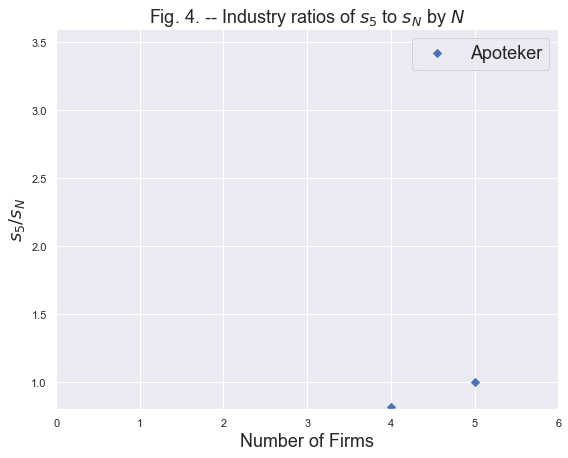

In [303]:
BIG = 18
fig = plt.figure(figsize=(9,7))
plt.plot([1,2,3,4,5], SN_S5_ratio, 'D', label='Apoteker')
ax = fig.get_axes()[0]
plt.legend(fontsize=BIG)
plt.xlim(0,6)
plt.ylim(0.8, 3.6)
plt.title('Fig. 4. -- Industry ratios of $s_5$ to $s_N$ by $N$', fontsize=BIG)
plt.xlabel('Number of Firms', fontsize=BIG)
plt.ylabel('$s_5/s_N$', fontsize=BIG);
# ax.set_ylabel('$s_5/s_N$', fontsize=40)